# **Various Steps Involved**
1. Importing the required Libraries.
2. Loading the train dataset and test dataset separately and combining the two for cleaning the data.
3. Rearranging columns to keep dependent and independent variables separately and keeping the independent     variable at the end.
4. Cleaning the data, which includes dealing with missing values, categorical data, names, combining columns and removing skewness.
5. Performing Exploratory data analysis and find out which factors contribute the most the chances of survival.

# **1. Importing the Required Libraries**

In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt  #plotting graphs and histograms for EDA
import seaborn as sns            #plotting distplots.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


# **2. Loading the data**

In [54]:
#Loading the data to train and test set.
train= pd.read_csv('../input/titanic/train.csv')  #train set
test= pd.read_csv('../input/titanic/test.csv')    #test set
combine= ['train','test']                         #combining train and test data for cleaning the data

In [55]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


['train', 'test']

In [56]:
#gives summary of numerical data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
#column information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
test.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# **3. Separating dependent and independent variables.**

In [59]:
#swapping 'Survived' column with the last column to keep the dependent variable at the end
cols= list(train.columns)
cols[-1], cols[1] = cols[1], cols[-1]
train=train[cols]

In [60]:
train

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,1,S,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,S,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,S,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0
887,888,S,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,1
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0
889,890,C,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1


In [61]:
#X=> independent variables, y=> dependent variables, iloc is used to locate indexes within the given range,
X= train.iloc[:,:-1].values
y= train.iloc[:,-1].values

In [62]:
X

array([[1, 'S', 3, ..., 'A/5 21171', 7.25, nan],
       [2, 'C', 1, ..., 'PC 17599', 71.2833, 'C85'],
       [3, 'S', 3, ..., 'STON/O2. 3101282', 7.925, nan],
       ...,
       [889, 'S', 3, ..., 'W./C. 6607', 23.45, nan],
       [890, 'C', 1, ..., '111369', 30.0, 'C148'],
       [891, 'Q', 3, ..., '370376', 7.75, nan]], dtype=object)

In [63]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

# **4a).Dealing with missing values**

In [64]:
#cabin has too many missing values, so it's best to drop that column, ticket isn't relavent to the model, so that can be dropped as well
train = train.drop(['Ticket', 'Cabin'],axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

In [65]:
train

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Survived
0,1,S,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1
2,3,S,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,S,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,0
887,888,S,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,1
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,0
889,890,C,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,1


In [66]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


### **4b).Age has a few missing values, so the mean strategy can be used**

In [67]:
#taking mean of all ages and assigning that to the missing values in age column
train['Age'] = train['Age'].fillna(np.mean(train['Age']))

test['Age'] = test['Age'].fillna(np.mean(test['Age']))

In [203]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Embarked     889 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [15]:
train

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Survived
0,1,S,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,1
2,3,S,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,1
4,5,S,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,0
887,888,S,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,1
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,0
889,890,C,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,1


In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [69]:
#dropping all missing values
train=train.dropna(axis=0)
test=test.dropna(axis=0)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Embarked     889 non-null    object 
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Survived     889 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 76.4+ KB


In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 32.6+ KB


In [71]:
train

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Survived
0,1,S,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,1
2,3,S,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,1
4,5,S,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,0
887,888,S,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,1
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,0
889,890,C,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,1


## **4c).Convert Sex to categorical data** 

In [72]:
#assigning '0' to male and '1' to female.
train['Sex']= train['Sex'].map({'male':0, 'female':1})
test['Sex']= test['Sex'].map({'male':0, 'female':1})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
train

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Survived
0,1,S,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,1
2,3,S,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,1
4,5,S,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,0
887,888,S,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,1
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500,0
889,890,C,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,1


In [74]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,8.0500,S


### **4d). Dealing with Name**

In [75]:
# taking the title like  'mr ', 'mrs' etc for the name and adding a new column
train.Name.head(50)
train['Name_Title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

test.Name.head(50)
test['Name_Title'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
train

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Survived,Name_Title
0,1,S,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,0,Mr
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,1,Mrs
2,3,S,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,1,Miss
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,1,Mrs
4,5,S,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,0,Rev
887,888,S,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,1,Miss
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500,0,Miss
889,890,C,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,1,Mr


In [77]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Title
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,8.0500,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,108.9000,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,7.2500,S,Mr
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,8.0500,S,Mr


In [78]:
train['Name_Title'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Capt              1
Ms                1
Don               1
Mme               1
Lady              1
the Countess      1
Sir               1
Jonkheer          1
Name: Name_Title, dtype: int64

In [24]:
#getting the genders of 'Name_Titles'
pd.crosstab(train['Name_Title'], train['Sex'])

Sex,0,1
Name_Title,,
Capt,1,0
Col,2,0
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0
Miss,0,181


In [83]:
pd.crosstab(test['Name_Title'], test['Sex'])

Sex,0,1
Name_Title,,
Col,2,0
Dona,0,1
Dr,1,0
Master,21,0
Miss,0,78
Mr,239,0
Mrs,0,72
Ms,0,1
Rev,2,0


In [79]:
#Checking the survival rate of the passengers per 'Name_Title'
train[['Name_Title', 'Survived']].groupby(['Name_Title'], as_index = False).mean()

,Name_Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.696133
9,Mlle,1.000000


In [80]:
train

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Survived,Name_Title
0,1,S,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,0,Mr
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,1,Mrs
2,3,S,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,1,Miss
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,1,Mrs
4,5,S,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,S,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,0,Rev
887,888,S,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,1,Miss
888,889,S,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500,0,Miss
889,890,C,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,1,Mr


In [81]:
#assigning numerical values to 'Embarked'
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Title
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,7.8292,2,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,7.0000,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,9.6875,2,Mr
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,8.6625,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,12.2875,0,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,8.0500,0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,108.9000,1,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,7.2500,0,Mr
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,8.0500,0,Mr


In [218]:
train

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Survived,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,1,Mrs
2,3,0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,1,Miss
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,0,Rev
887,888,0,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,1,Mr


In [84]:
#Now that we have 'Name_Title to analyse the data, we do not require 'Name' column and 'Passenger Id' column
train=train.drop(['Name','PassengerId'],axis=1)
test=test.drop(['Name','PassengerId'],axis=1)

In [85]:
combine=[train,test]

In [86]:
train

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Name_Title
0,0,3,0,22.000000,1,0,7.2500,0,Mr
1,1,1,1,38.000000,1,0,71.2833,1,Mrs
2,0,3,1,26.000000,0,0,7.9250,1,Miss
3,0,1,1,35.000000,1,0,53.1000,1,Mrs
4,0,3,0,35.000000,0,0,8.0500,0,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,Rev
887,0,1,1,19.000000,0,0,30.0000,1,Miss
888,0,3,1,29.699118,1,2,23.4500,0,Miss
889,1,1,0,26.000000,0,0,30.0000,1,Mr


In [87]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Title
0,3,0,34.50000,0,0,7.8292,2,Mr
1,3,1,47.00000,1,0,7.0000,0,Mrs
2,2,0,62.00000,0,0,9.6875,2,Mr
3,3,0,27.00000,0,0,8.6625,0,Mr
4,3,1,22.00000,1,1,12.2875,0,Mrs
...,...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0,Mr
414,1,1,39.00000,0,0,108.9000,1,Dona
415,3,0,38.50000,0,0,7.2500,0,Mr
416,3,0,30.27259,0,0,8.0500,0,Mr


In [91]:
#replacing 'Rev' with 'Mr'
for data in combine:
    data['Name_Title'] = data['Name_Title'].replace('Ms', 'Miss')
    data['Name_Title'] = data['Name_Title'].replace(['the Countess','Mme','Lady','Mlle','Dona'], 'Mrs')
    data['Name_Title'] = data['Name_Title'].replace(['Sir','Dr','Jonkheer','Major','Col','Capt','Don','Rev'], 'Mr')


In [92]:
train

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Name_Title
0,0,3,0,22.000000,1,0,7.2500,0,Mr
1,1,1,1,38.000000,1,0,71.2833,1,Mrs
2,0,3,1,26.000000,0,0,7.9250,1,Miss
3,0,1,1,35.000000,1,0,53.1000,1,Mrs
4,0,3,0,35.000000,0,0,8.0500,0,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,Mr
887,0,1,1,19.000000,0,0,30.0000,1,Miss
888,0,3,1,29.699118,1,2,23.4500,0,Miss
889,1,1,0,26.000000,0,0,30.0000,1,Mr


In [93]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Title
0,3,0,34.50000,0,0,7.8292,2,Mr
1,3,1,47.00000,1,0,7.0000,0,Mrs
2,2,0,62.00000,0,0,9.6875,2,Mr
3,3,0,27.00000,0,0,8.6625,0,Mr
4,3,1,22.00000,1,1,12.2875,0,Mrs
...,...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0,Mr
414,1,1,39.00000,0,0,108.9000,1,Mrs
415,3,0,38.50000,0,0,7.2500,0,Mr
416,3,0,30.27259,0,0,8.0500,0,Mr


In [94]:
#Now comparing the titles with gender
pd.crosstab(train['Name_Title'], train['Sex'])

Sex,0,1
Name_Title,,
Master,40,0
Miss,0,182
Mr,537,1
Mrs,0,129


In [95]:
#assingning numerical values to the 'Name_title' column
train['Name_Title']=train['Name_Title'].map({'Mr':0,'Mrs':1,'Master':2,'Miss':3})
test['Name_Title']=test['Name_Title'].map({'Mr':0,'Mrs':1,'Master':2,'Miss':3})

In [96]:
train

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Name_Title
0,0,3,0,22.000000,1,0,7.2500,0,0
1,1,1,1,38.000000,1,0,71.2833,1,1
2,0,3,1,26.000000,0,0,7.9250,1,3
3,0,1,1,35.000000,1,0,53.1000,1,1
4,0,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0
887,0,1,1,19.000000,0,0,30.0000,1,3
888,0,3,1,29.699118,1,2,23.4500,0,3
889,1,1,0,26.000000,0,0,30.0000,1,0


In [97]:
#Shifting dependen variable at the end

cols2= list(train.columns)
cols2[-1], cols2[-2] = cols2[-2], cols2[-1]
train=train[cols2]


In [98]:
train

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Title,Survived
0,0,3,0,22.000000,1,0,7.2500,0,0
1,1,1,1,38.000000,1,0,71.2833,1,1
2,0,3,1,26.000000,0,0,7.9250,3,1
3,0,1,1,35.000000,1,0,53.1000,1,1
4,0,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0
887,0,1,1,19.000000,0,0,30.0000,3,1
888,0,3,1,29.699118,1,2,23.4500,3,0
889,1,1,0,26.000000,0,0,30.0000,0,1


In [99]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Title
0,3,0,34.50000,0,0,7.8292,2,0
1,3,1,47.00000,1,0,7.0000,0,1
2,2,0,62.00000,0,0,9.6875,2,0
3,3,0,27.00000,0,0,8.6625,0,0
4,3,1,22.00000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0,0
414,1,1,39.00000,0,0,108.9000,1,1
415,3,0,38.50000,0,0,7.2500,0,0
416,3,0,30.27259,0,0,8.0500,0,0


In [37]:
train.describe()

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Name_Title
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.362205,2.311586,0.350956,29.653446,0.524184,0.382452,32.096681,0.382452,0.849269
std,0.636157,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504,0.486260,1.203318
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,2.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000


In [101]:
combine=[train,test]

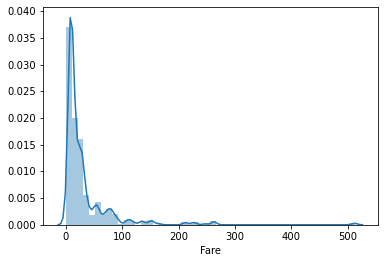

In [102]:
sns.distplot(train['Fare'])
#due to excess outliers in the price, we are removing the top 1%


In [103]:
q=train['Fare'].quantile(0.99)
#Taking the 99th percentile of Price
q1=test['Fare'].quantile(0.99)
train=train[train['Fare']<q]
test=test[test['Fare']<q]
#displaying everything less than the 99th percentile of price

In [104]:
train.describe()

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Title,Survived
count,880.000000,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,0.360227,2.32500,0.348864,29.644220,0.513636,0.369318,28.886604,0.840909,0.378409
std,0.637122,0.82829,0.476882,12.961170,1.097021,0.791717,36.529792,1.197137,0.485266
min,0.000000,1.00000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.00000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,3.00000,0.000000,29.699118,0.000000,0.000000,14.427100,0.000000,0.000000
75%,1.000000,3.00000,1.000000,35.000000,1.000000,0.000000,30.500000,1.000000,1.000000
max,2.000000,3.00000,1.000000,80.000000,8.000000,6.000000,247.520800,3.000000,1.000000


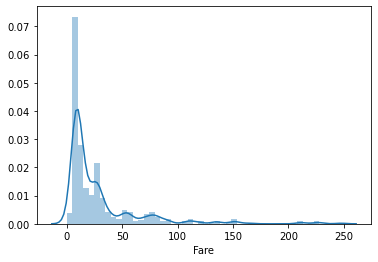

In [105]:
sns.distplot(train['Fare'])

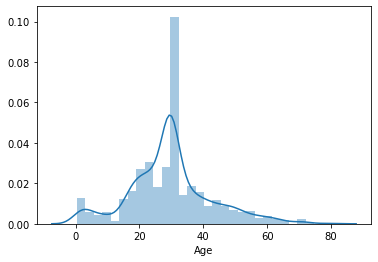

In [106]:
sns.distplot(train['Age'])

# 5). Exploratory Data Analysis

In [108]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Title
0,3,0,34.50000,0,0,7.8292,2,0
1,3,1,47.00000,1,0,7.0000,0,1
2,2,0,62.00000,0,0,9.6875,2,0
3,3,0,27.00000,0,0,8.6625,0,0
4,3,1,22.00000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0,0
414,1,1,39.00000,0,0,108.9000,1,1
415,3,0,38.50000,0,0,7.2500,0,0
416,3,0,30.27259,0,0,8.0500,0,0


In [107]:
train[['Name_Title', 'Survived']].groupby(['Name_Title'], as_index = False).mean()

,Name_Title,Survived
0,0,0.159176
1,1,0.798450
2,2,0.575000
3,3,0.689266


In [109]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,0,0.186736
1,1,0.736156


In [110]:
train[['Survived', 'Pclass']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.619512
1,2,0.472826
2,3,0.242363


In [111]:
train[['Survived', 'SibSp']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.538462
2,2,0.423077
0,0,0.339967
4,4,0.166667
3,3,0.153846
5,5,0.000000
6,8,0.000000


In [112]:
train[['Survived', 'Parch']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.547009
2,2,0.480000
0,0,0.339763
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [113]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Title
0,3,0,34.50000,0,0,7.8292,2,0
1,3,1,47.00000,1,0,7.0000,0,1
2,2,0,62.00000,0,0,9.6875,2,0
3,3,0,27.00000,0,0,8.6625,0,0
4,3,1,22.00000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0,0
414,1,1,39.00000,0,0,108.9000,1,1
415,3,0,38.50000,0,0,7.2500,0,0
416,3,0,30.27259,0,0,8.0500,0,0


In [114]:
#splitting age band into 5 intervals
train['AgeBand'] = pd.cut(train['Age'], 6)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by='AgeBand', ascending = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AgeBand,Survived
0,"(0.34, 13.683]",0.591549
1,"(13.683, 26.947]",0.345679
2,"(26.947, 40.21]",0.366029
3,"(40.21, 53.473]",0.390000
4,"(53.473, 66.737]",0.341463
5,"(66.737, 80.0]",0.142857


In [120]:
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
train

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Title,Survived,AgeBand
0,0,3,0,22,1,0,7.2500,0,0,"(13.683, 26.947]"
1,1,1,1,38,1,0,71.2833,1,1,"(26.947, 40.21]"
2,0,3,1,26,0,0,7.9250,3,1,"(13.683, 26.947]"
3,0,1,1,35,1,0,53.1000,1,1,"(26.947, 40.21]"
4,0,3,0,35,0,0,8.0500,0,0,"(26.947, 40.21]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,0,0,"(26.947, 40.21]"
887,0,1,1,19,0,0,30.0000,3,1,"(13.683, 26.947]"
888,0,3,1,29,1,2,23.4500,3,0,"(26.947, 40.21]"
889,1,1,0,26,0,0,30.0000,0,1,"(13.683, 26.947]"


In [132]:
combine=[train,test]

In [133]:
for data in combine:
    data.loc[ data['Age'] <= 14, 'Age'] = 0
    data.loc[(data['Age'] > 14) & (data['Age'] <= 27), 'Age'] = 1
    data.loc[(data['Age'] > 27) & (data['Age'] <= 40), 'Age'] = 2
    data.loc[(data['Age'] > 40) & (data['Age'] <= 53), 'Age'] = 3
    data.loc[(data['Age'] > 53) & (data['Age'] <= 67), 'Age'] = 4
    data.loc[ data['Age'] > 67, 'Age']=5

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [134]:
train.head()

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Title,Survived,AgeBand
0,0,3,0,1,1,0,7.2500,0,0,"(13.683, 26.947]"
1,1,1,1,2,1,0,71.2833,1,1,"(26.947, 40.21]"
2,0,3,1,1,0,0,7.9250,3,1,"(13.683, 26.947]"
3,0,1,1,2,1,0,53.1000,1,1,"(26.947, 40.21]"
4,0,3,0,2,0,0,8.0500,0,0,"(26.947, 40.21]"


In [141]:
train

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Title,Survived
0,0,3,0,1,1,0,7.2500,0,0
1,1,1,1,2,1,0,71.2833,1,1
2,0,3,1,1,0,0,7.9250,3,1
3,0,1,1,2,1,0,53.1000,1,1
4,0,3,0,2,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,0,0
887,0,1,1,1,0,0,30.0000,3,1
888,0,3,1,2,1,2,23.4500,3,0
889,1,1,0,1,0,0,30.0000,0,1


In [142]:
#Age band isn't required
train=train.drop(['AgeBand'],axis=1)
test=test.drop(['AgeBand'],axis=1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Title
0,3,0,2,0,0,7.8292,2,0
1,3,1,3,1,0,7.0000,0,1
2,2,0,4,0,0,9.6875,2,0
3,3,0,1,0,0,8.6625,0,0
4,3,1,1,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,0,2,0,0,8.0500,0,0
414,1,1,2,0,0,108.9000,1,1
415,3,0,2,0,0,7.2500,0,0
416,3,0,2,0,0,8.0500,0,0


In [144]:
train['Fare']=train['Fare'].astype(int)
test['Fare']=test['Fare'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [146]:
train.head()

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Title,Survived
0,0,3,0,1,1,0,7,0,0
1,1,1,1,2,1,0,71,1,1
2,0,3,1,1,0,0,7,3,1
3,0,1,1,2,1,0,53,1,1
4,0,3,0,2,0,0,8,0,0


In [150]:
train.drop(['AgeBand'],axis=1)

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Title,Survived
0,0,3,0,1,1,0,7,0,0
1,1,1,1,2,1,0,71,1,1
2,0,3,1,1,0,0,7,3,1
3,0,1,1,2,1,0,53,1,1
4,0,3,0,2,0,0,8,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13,0,0
887,0,1,1,1,0,0,30,3,1
888,0,3,1,2,1,2,23,3,0
889,1,1,0,1,0,0,30,0,1


In [147]:
combine=[train,test]

In [152]:
train['Fare_Range'] = pd.cut(train['Fare'], 6)
train[['Fare_Range', 'Survived']].groupby(['Fare_Range'], as_index = False).mean().sort_values(by='Fare_Range', ascending = True)

,Fare_Range,Survived
0,"(-0.247, 41.167]",0.321280
1,"(41.167, 82.333]",0.545455
2,"(82.333, 123.5]",0.818182
3,"(123.5, 164.667]",0.777778
4,"(164.667, 205.833]",NaN
5,"(205.833, 247.0]",0.636364


In [154]:
for data in combine:
    data.loc[ data['Fare'] <= 41, 'Fare'] = 0
    data.loc[(data['Fare'] > 41) & (data['Fare'] <= 82), 'Fare'] = 1
    data.loc[(data['Fare'] > 82) & (data['Fare'] <= 124), 'Fare'] = 2
    data.loc[(data['Fare'] > 124) & (data['Fare'] <= 165), 'Fare'] = 3
    data.loc[(data['Fare'] > 165) & (data['Fare'] <= 206), 'Fare'] = 4
    data.loc[ data['Fare'] > 206, 'Fare']=5

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib

In [155]:
train

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Title,Survived,AgeBand,Fare_Range
0,0,3,0,1,1,0,0,0,0,"(0.833, 1.667]","(-0.247, 41.167]"
1,1,1,1,2,1,0,1,1,1,"(1.667, 2.5]","(41.167, 82.333]"
2,0,3,1,1,0,0,0,3,1,"(0.833, 1.667]","(-0.247, 41.167]"
3,0,1,1,2,1,0,1,1,1,"(1.667, 2.5]","(41.167, 82.333]"
4,0,3,0,2,0,0,0,0,0,"(1.667, 2.5]","(-0.247, 41.167]"
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,0,0,0,"(0.833, 1.667]","(-0.247, 41.167]"
887,0,1,1,1,0,0,0,3,1,"(0.833, 1.667]","(-0.247, 41.167]"
888,0,3,1,2,1,2,0,3,0,"(1.667, 2.5]","(-0.247, 41.167]"
889,1,1,0,1,0,0,0,0,1,"(0.833, 1.667]","(-0.247, 41.167]"


In [160]:
train=train.drop(['AgeBand','Fare_Range'],axis=1)

In [157]:
train[['Survived', 'Age']].groupby(['Age'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Age,Survived
0,0,0.576923
3,3,0.397959
1,1,0.362205
2,2,0.353234
4,4,0.341463
5,5,0.142857


In [158]:
train[['Survived', 'Fare']].groupby(['Fare'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Fare,Survived
2,2,0.818182
3,3,0.777778
4,5,0.636364
1,1,0.545455
0,0,0.321280


In [161]:
train

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Title,Survived
0,0,3,0,1,1,0,0,0,0
1,1,1,1,2,1,0,1,1,1
2,0,3,1,1,0,0,0,3,1
3,0,1,1,2,1,0,1,1,1
4,0,3,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,0,0,0
887,0,1,1,1,0,0,0,3,1
888,0,3,1,2,1,2,0,3,0
889,1,1,0,1,0,0,0,0,1


In [162]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Title
0,3,0,2,0,0,0,2,0
1,3,1,3,1,0,0,0,1
2,2,0,4,0,0,0,2,0
3,3,0,1,0,0,0,0,0
4,3,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...
413,3,0,2,0,0,0,0,0
414,1,1,2,0,0,2,1,1
415,3,0,2,0,0,0,0,0
416,3,0,2,0,0,0,0,0


# **5).Building the Model**

In [164]:
x_train = train.drop(['Survived'], axis = 1)
y_train = train['Survived']

In [166]:
from sklearn.linear_model import LogisticRegression

In [168]:
log_reg = LogisticRegression()
log_fit = log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(test)
log_reg_score = log_reg.score(x_train, y_train) * 100
log_reg_score

80.45454545454545